Sales Prediction for the Next Quarter Using Historical Data Scenario: The Sales Team wants to predict the total sales for the next quarter (Q2 2023) based on historical sales data. Requirements:..1. Use the sales data from Q1 2022 to Q4 2022 to build a model that predicts total sales for Q2 2023. 2. Evaluate the model’s accuracy using a relevant error metric (e.g., MAE, RMSE). 3. Provide predictions for the upcoming quarter and identify any trends. Key Features to Use: • order_date • qty_ordered • Machine learning model libraries (e.g., Scikit-learn, Statsmodels)

📊 Forecast for Q2 2023 (Monthly Sales):
2023-04-01    231.589231
2023-05-01    183.502218
2023-06-01    135.415205
Freq: MS, dtype: float64

Predicted Q2 Total Sales: 551

Model Accuracy on Training Data - MAE: 262.57, RMSE: 324.56


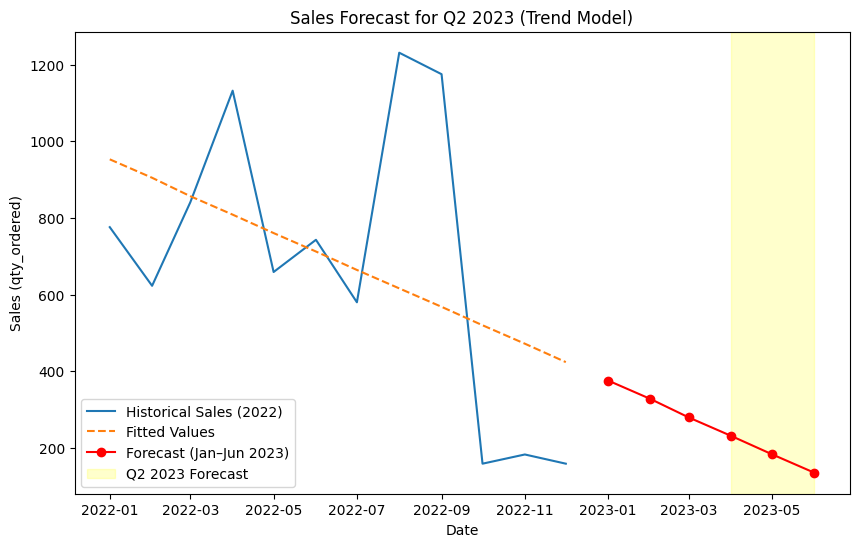

In [6]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load data
file_path = r"C:\Users\bhave\OneDrive\Desktop\dashboard\dataset2\finaldataset.csv"
df = pd.read_csv(file_path)

# Step 2: Convert order_date to datetime
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# Step 3: Aggregate monthly sales
df['year_month'] = df['order_date'].dt.to_period("M")
monthly_sales = df.groupby('year_month')['qty_ordered'].sum().to_timestamp()

# Step 4: Train on 2022 data
train = monthly_sales['2022-01':'2022-12']

# Step 5: Build Holt-Winters model (trend only)
model = ExponentialSmoothing(
    train,
    trend="add",
    seasonal=None
).fit()

# Step 6: Forecast next 6 months, then pick Q2 (Apr–Jun 2023)
forecast_all = model.forecast(6)        # Forecast Jan–Jun 2023
forecast_q2 = forecast_all.iloc[3:]     # Extract Apr–Jun (Q2)

# Step 7: Evaluate accuracy on training set (backtest)
y_pred = model.fittedvalues
mae = mean_absolute_error(train, y_pred)
rmse = np.sqrt(mean_squared_error(train, y_pred))

print("📊 Forecast for Q2 2023 (Monthly Sales):")
print(forecast_q2)
print(f"\nPredicted Q2 Total Sales: {forecast_q2.sum():.0f}")
print(f"\nModel Accuracy on Training Data - MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# Step 8: Visualization
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label="Historical Sales (2022)")
plt.plot(y_pred.index, y_pred, label="Fitted Values", linestyle="--")
plt.plot(forecast_all.index, forecast_all, label="Forecast (Jan–Jun 2023)", color="red", marker="o")
plt.axvspan(forecast_q2.index[0], forecast_q2.index[-1], color="yellow", alpha=0.2, label="Q2 2023 Forecast")
plt.title("Sales Forecast for Q2 2023 (Trend Model)")
plt.xlabel("Date")
plt.ylabel("Sales (qty_ordered)")
plt.legend()
plt.show()

